In [1]:
import pandas as pd

In [2]:
df_fishing_vessels = pd.read_csv("data/csv/fishing-vessels-v2.csv")
df_loiter_carrier = pd.read_csv("data/csv/carrier_loitering_v20210408.csv")
df_loiter_bunker = pd.read_csv("data/csv/bunker_loitering_v20210408.csv")
df_model_raw = pd.read_csv("data/csv/s1_training_final.csv")
df_model_labels = pd.read_csv("data/csv/s4_final_model_predictions.csv")


In [3]:
merge_on = ["hours","fishing_hours","average_daily_fishing_hours","fishing_hours_foreign_eez","fishing_hours_high_seas","distance_traveled_km"]
df_model = pd.merge(df_model_raw[merge_on + ["mmsi"]],df_model_labels, on=merge_on, how="right" )
df_model

,hours,fishing_hours,average_daily_fishing_hours,fishing_hours_foreign_eez,fishing_hours_high_seas,distance_traveled_km,mmsi,year,offender,.pred_1,...,number_poc_port_visits,average_voyage_duration_hours,number_loitering_events,average_loitering_duration_hours,Country,class,Prediction,Label,mmsi_anonymous,.seed
0,3753.507222,5.777361,0.962894,5.777361,0.0,1757.742210,25,2015,0,0.314962,...,0,31.956522,1,1.000000,China,0,Negative,Unlabeled,d3efea310f04feb5bc6cbb906aec42d3903aa1e6626106...,101
1,6226.145694,45.087778,3.468291,45.087778,0.0,13644.277995,2349,2014,0,0.385735,...,0,22.000000,39,4.743590,Peru,0,Negative,Unlabeled,2565bf54218d1c748f257d19222bf7ad77cb2f2f2726fb...,101
2,6368.826944,223.169028,4.554470,223.169028,0.0,15735.326149,2349,2015,0,0.359586,...,0,25.948276,33,4.060606,Peru,0,Negative,Unlabeled,2565bf54218d1c748f257d19222bf7ad77cb2f2f2726fb...,101
3,4722.466250,292.093750,5.841875,292.093750,0.0,22665.657182,2349,2016,0,0.402640,...,49,41.142857,102,2.656863,Peru,0,Negative,Unlabeled,2565bf54218d1c748f257d19222bf7ad77cb2f2f2726fb...,101
4,5396.207500,532.485833,7.830674,532.485833,0.0,24046.545333,2349,2017,0,0.403283,...,54,89.642857,131,2.816794,Peru,0,Negative,Unlabeled,2565bf54218d1c748f257d19222bf7ad77cb2f2f2726fb...,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66381,2311.004444,1317.688056,12.793088,1233.286806,0.0,7345.639569,999941603,2018,0,0.266161,...,0,2311.004444,68,9.367647,China,0,Negative,Unlabeled,6e8f0985a608be13830d3aefbb5208099116451b17b042...,101
66382,326.022222,0.068056,0.068056,0.068056,0.0,1558.301899,999991838,2016,0,0.317194,...,9,169.111111,4,7.250000,China,0,Negative,Unlabeled,0e132f91148ed9f9bda89f74a7c5612830e05f727944d7...,101
66383,1126.582222,261.526806,8.172713,259.645833,0.0,5105.997240,999991838,2017,0,0.274081,...,17,250.058824,27,8.703704,China,0,Negative,Unlabeled,0e132f91148ed9f9bda89f74a7c5612830e05f727944d7...,101
66384,103.736389,0.000000,0.000000,0.000000,0.0,508.057184,999991838,2018,0,0.325771,...,0,103.736389,4,6.500000,China,0,Negative,Unlabeled,0e132f91148ed9f9bda89f74a7c5612830e05f727944d7...,101


In [4]:
df_grouped_mmsi = df_model.groupby("mmsi")["Prediction"].apply(pd.Series.mode).reset_index()#.agg(pd.Series.mode).reset_index()
df_grouped_mmsi = df_grouped_mmsi.drop_duplicates(subset=['mmsi'], keep="last")

df_grouped_mmsi

,mmsi,level_1,Prediction
0,25,0,Negative
1,2349,0,Negative
2,5440,0,Negative
3,5608,0,Negative
4,6018,0,Negative
...,...,...,...
16568,999711122,0,Negative
16569,999790788,0,Negative
16570,999941603,0,Negative
16571,999991838,0,Negative


In [5]:
df_loiter_data_carrier = pd.merge(df_grouped_mmsi[["mmsi","Prediction"]], df_loiter_carrier, left_on="mmsi", right_on="carrier_mmsi", how="right")
df_loiter_data_bunker = pd.merge(df_grouped_mmsi[["mmsi","Prediction"]], df_loiter_bunker, left_on="mmsi", right_on="bunker_mmsi", how="right")
df_loiter_data = pd.concat([df_loiter_data_carrier, df_loiter_data_bunker])
df_loiter_data

,mmsi,Prediction,carrier_mmsi,start_lat,start_lon,end_lat,end_lon,mean_lon,mean_lat,loitering_start_timestamp,loitering_end_timestamp,loitering_hours,tot_distance_nm,avg_speed_knots,avg_distance_from_shore_nm,bunker_mmsi
0,NaN,NaN,212856000.0,35.485170,-2.043368,35.859573,-1.731522,-1.887811,35.672472,2017-01-05T03:59:08Z,2017-01-06T23:24:00Z,43.414444,49.105523,1.131087,28.119723,NaN
1,NaN,NaN,212856000.0,3.201850,2.868275,3.137343,2.857642,2.862958,3.169597,2014-12-28T10:40:17Z,2014-12-31T11:41:58Z,73.028056,20.935786,0.286681,184.875076,NaN
2,NaN,NaN,212856000.0,35.859207,-4.558310,35.789120,-4.378147,-4.468189,35.824197,2016-01-07T08:49:23Z,2016-01-07T15:53:59Z,7.076667,10.109137,1.428517,37.190765,NaN
3,NaN,NaN,212856000.0,2.989312,2.761637,3.009503,2.783165,2.772401,2.999408,2015-05-07T09:08:42Z,2015-05-07T22:46:45Z,13.634167,2.115533,0.155164,195.053557,NaN
4,NaN,NaN,212856000.0,35.622352,-3.618660,35.853398,-4.024400,-3.821236,35.738045,2017-01-02T03:23:55Z,2017-01-03T06:56:06Z,27.536389,33.503697,1.216706,29.085654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90836,NaN,NaN,NaN,-1.387675,170.909387,-1.422965,170.845828,170.877608,-1.405320,2016-07-17T04:54:25Z,2016-07-17T14:30:33Z,9.602222,6.217654,0.647522,85.981389,577201000.0
90837,NaN,NaN,NaN,3.517702,-153.462955,3.498468,-153.479175,-153.471065,3.508085,2016-03-07T22:55:05Z,2016-03-08T12:48:00Z,13.881944,19.980320,1.439303,238.336544,577201000.0
90838,NaN,NaN,NaN,-4.006238,-156.655083,-4.088183,-156.773345,-156.714211,-4.047213,2016-10-18T13:01:32Z,2016-10-18T19:59:02Z,6.958333,8.635886,1.241085,103.361657,577201000.0
90839,NaN,NaN,NaN,-3.490085,-157.980657,-3.523960,-158.127305,-158.053979,-3.507025,2016-10-19T11:47:34Z,2016-10-19T20:57:42Z,9.168889,9.357051,1.020522,178.674157,577201000.0


In [6]:
IUU_LABEL = 0
NON_IUU_LABEL = 1
UNLABELLED = -1
df_loiter_data['loitering_start_timestamp'] = pd.to_datetime(df_loiter_data['loitering_start_timestamp'], infer_datetime_format=True)
df_loiter_data['loitering_start_hour'] = df_loiter_data['loitering_start_timestamp'].dt.hour
df_loiter_data['response'] = df_loiter_data['Prediction'].apply(lambda x: IUU_LABEL if x == 'Positive' else (NON_IUU_LABEL if x == 'Negative' else UNLABELLED))


C:\Users\hieuh\AppData\Local\Temp\ipykernel_6308\1191930621.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_loiter_data['loitering_start_timestamp'] = pd.to_datetime(df_loiter_data['loitering_start_timestamp'], infer_datetime_format=True)


In [72]:
df_loiter_data_unlabeled = df_loiter_data[df_loiter_data['response'] == UNLABELLED].reset_index(drop=True)
df_loiter_data_labeled = df_loiter_data[df_loiter_data['response'] != UNLABELLED].reset_index(drop=True)
df_loiter_data_unlabeled


,mmsi,Prediction,carrier_mmsi,start_lat,start_lon,end_lat,end_lon,mean_lon,mean_lat,loitering_start_timestamp,loitering_end_timestamp,loitering_hours,tot_distance_nm,avg_speed_knots,avg_distance_from_shore_nm,bunker_mmsi,loitering_start_hour,response
0,NaN,NaN,212856000.0,35.485170,-2.043368,35.859573,-1.731522,-1.887811,35.672472,2017-01-05 03:59:08+00:00,2017-01-06T23:24:00Z,43.414444,49.105523,1.131087,28.119723,NaN,3,-1
1,NaN,NaN,212856000.0,3.201850,2.868275,3.137343,2.857642,2.862958,3.169597,2014-12-28 10:40:17+00:00,2014-12-31T11:41:58Z,73.028056,20.935786,0.286681,184.875076,NaN,10,-1
2,NaN,NaN,212856000.0,35.859207,-4.558310,35.789120,-4.378147,-4.468189,35.824197,2016-01-07 08:49:23+00:00,2016-01-07T15:53:59Z,7.076667,10.109137,1.428517,37.190765,NaN,8,-1
3,NaN,NaN,212856000.0,2.989312,2.761637,3.009503,2.783165,2.772401,2.999408,2015-05-07 09:08:42+00:00,2015-05-07T22:46:45Z,13.634167,2.115533,0.155164,195.053557,NaN,9,-1
4,NaN,NaN,212856000.0,35.622352,-3.618660,35.853398,-4.024400,-3.821236,35.738045,2017-01-02 03:23:55+00:00,2017-01-03T06:56:06Z,27.536389,33.503697,1.216706,29.085654,NaN,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188094,NaN,NaN,NaN,-1.387675,170.909387,-1.422965,170.845828,170.877608,-1.405320,2016-07-17 04:54:25+00:00,2016-07-17T14:30:33Z,9.602222,6.217654,0.647522,85.981389,577201000.0,4,-1
188095,NaN,NaN,NaN,3.517702,-153.462955,3.498468,-153.479175,-153.471065,3.508085,2016-03-07 22:55:05+00:00,2016-03-08T12:48:00Z,13.881944,19.980320,1.439303,238.336544,577201000.0,22,-1
188096,NaN,NaN,NaN,-4.006238,-156.655083,-4.088183,-156.773345,-156.714211,-4.047213,2016-10-18 13:01:32+00:00,2016-10-18T19:59:02Z,6.958333,8.635886,1.241085,103.361657,577201000.0,13,-1
188097,NaN,NaN,NaN,-3.490085,-157.980657,-3.523960,-158.127305,-158.053979,-3.507025,2016-10-19 11:47:34+00:00,2016-10-19T20:57:42Z,9.168889,9.357051,1.020522,178.674157,577201000.0,11,-1


In [8]:
outliers_labeled = [987]
df_loiter_data_labeled.drop(index=outliers_labeled, inplace=True)


In [15]:
rel_cols = ['response','loitering_start_hour','loitering_hours','avg_speed_knots','avg_distance_from_shore_nm']
df_raw_all = df_loiter_data[rel_cols]
df_raw_labeled = df_loiter_data_labeled[rel_cols]
df_raw_unlabeled = df_loiter_data_unlabeled[rel_cols]

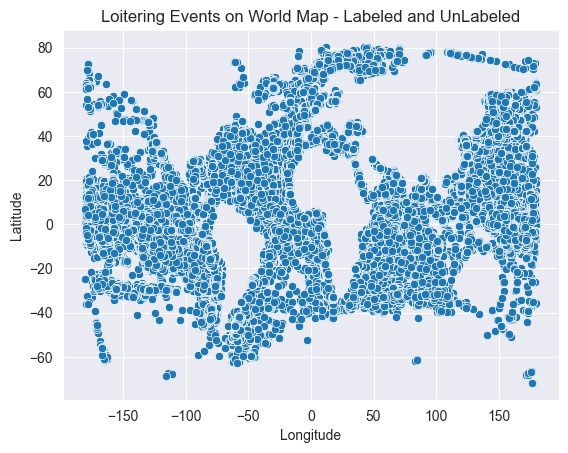

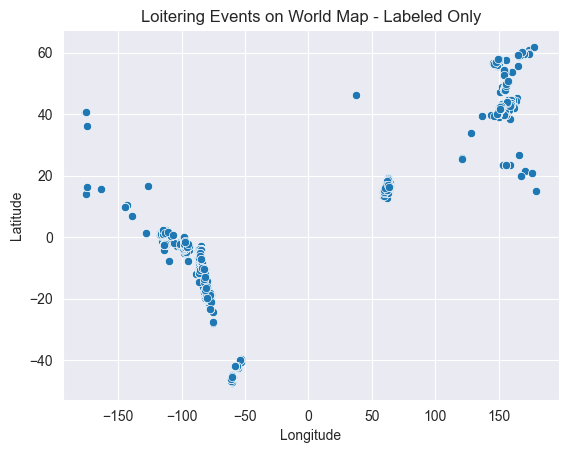

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
## See locations of all loitering events using latitude and longitude
# ALL DATAPOINTS
ax2 = sns.scatterplot(data=df_loiter_data, x="mean_lon",y="mean_lat")
ax2.set(title="Loitering Events on World Map - Labeled and UnLabeled", xlabel="Longitude", ylabel="Latitude")
plt.show()
# LABELED DATA ONLY
ax1 = sns.scatterplot(data=df_loiter_data_labeled, x="mean_lon",y="mean_lat")
ax1.set(title="Loitering Events on World Map - Labeled Only", xlabel="Longitude", ylabel="Latitude")
plt.show()

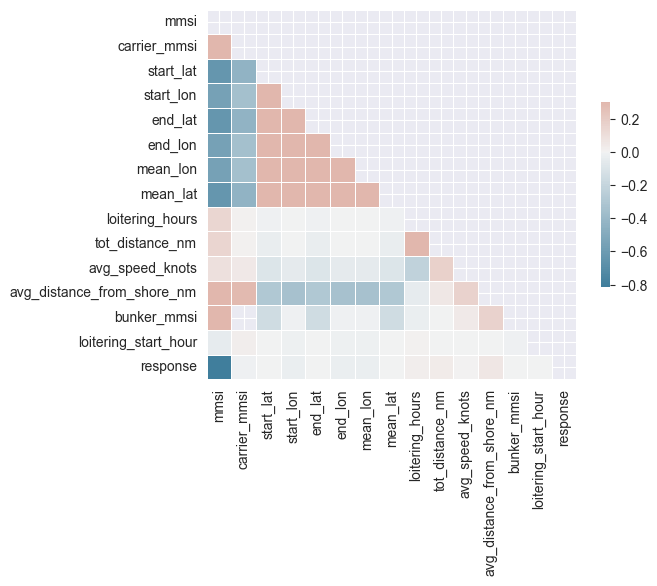

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chỉ lấy các cột có kiểu dữ liệu số
df_numeric = df_loiter_data.select_dtypes(include=[np.number])

# Tính ma trận tương quan chỉ với các cột số
corr = df_numeric.corr()

# Tạo heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


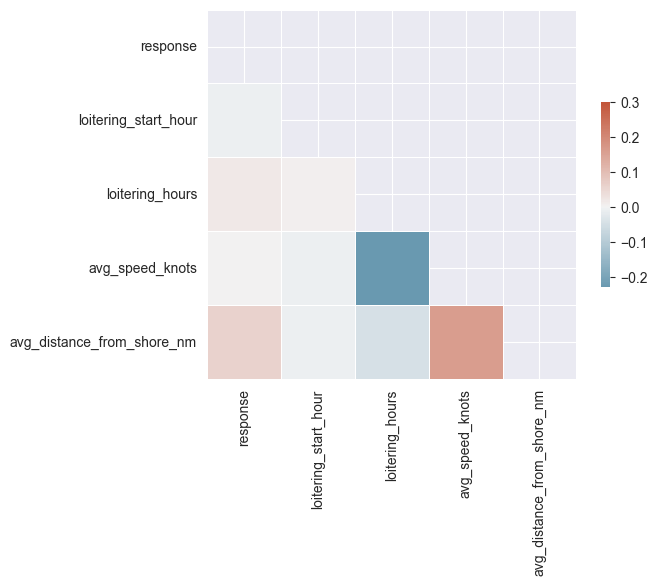

In [12]:

# Chỉ lấy các cột có kiểu dữ liệu số
df_numeric = df_raw_all.select_dtypes(include=[np.number])

# Tính ma trận tương quan chỉ với các cột số
corr = df_numeric.corr()

# Tạo heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [23]:
df_raw_labeled

,response,loitering_start_hour,loitering_hours,avg_speed_knots,avg_distance_from_shore_nm
0,1,22,7.956667,0.051171,28.922845
1,0,13,36.366111,0.443974,236.507118
2,0,13,22.817500,0.376033,341.128332
3,0,3,10.116944,0.893998,248.789548
4,0,11,21.123333,0.838314,347.040045
...,...,...,...,...,...
2240,1,4,5.707778,0.800018,207.343412
2241,1,18,4.910556,0.459691,209.205130
2242,1,0,10.257222,0.732148,210.079943
2243,1,23,22.502500,1.047429,204.852009


In [22]:
x = df_raw_labeled.drop(columns= "response").values
y = df_raw_labeled["response"].values

In [39]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

seed = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= seed)

# Chuyển đổi dữ liệu numpy sang tensor PyTorch
X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

len(y_train_tensor.unique())

2

In [38]:
# Tính toán trung bình và độ lệch chuẩn để chuẩn hóa
mean = X_train_tensor.mean(dim=0)
std = X_train_tensor.std(dim=0)

# Chuẩn hóa dữ liệu
X_train_normalized = (X_train_tensor - mean) / std
X_test_normalized = (X_test_tensor - mean) / std

In [40]:
# Định nghĩa mô hình ANN
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [42]:
# Khởi tạo mô hình
input_size = x_train.shape[1]
hidden_size = 64
num_classes = len(y_train_tensor.unique())
model = ANNModel(input_size, hidden_size, num_classes)


# Khởi tạo mô hình
model = ANNModel(input_size, hidden_size, num_classes)

# Khởi tạo tiêu chuẩn lỗi và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
# Huấn luyện mô hình
train_loss_history = []
train_acc_history = []
test_acc_history = []

num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass (tiến trình lan truyền)
    outputs = model(X_train_normalized)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass (lan truyền ngược) và tối ưu hóa
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Lưu loss sau mỗi epoch
    train_loss_history.append(loss.item())
    
    # Tính accuracy cho tập huấn luyện
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = (predicted_train == y_train_tensor).sum().item() / len(y_train_tensor)
    train_acc_history.append(train_acc)
    
    # Tính accuracy cho tập kiểm thử
    model.eval()  # Chuyển mô hình sang chế độ đánh giá
    with torch.no_grad():
        test_outputs = model(X_test_normalized)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = (predicted_test == y_test_tensor).sum().item() / len(y_test_tensor)
        test_acc_history.append(test_acc)
    model.train()  # Chuyển lại chế độ huấn luyện
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Epoch [1/100], Loss: 0.1564, Train Accuracy: 0.9454, Test Accuracy: 0.9488
Epoch [2/100], Loss: 0.1556, Train Accuracy: 0.9454, Test Accuracy: 0.9488
Epoch [3/100], Loss: 0.1548, Train Accuracy: 0.9454, Test Accuracy: 0.9488
Epoch [4/100], Loss: 0.1540, Train Accuracy: 0.9454, Test Accuracy: 0.9488
Epoch [5/100], Loss: 0.1533, Train Accuracy: 0.9454, Test Accuracy: 0.9488
Epoch [6/100], Loss: 0.1526, Train Accuracy: 0.9454, Test Accuracy: 0.9488
Epoch [7/100], Loss: 0.1520, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [8/100], Loss: 0.1513, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [9/100], Loss: 0.1507, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [10/100], Loss: 0.1501, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [11/100], Loss: 0.1496, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [12/100], Loss: 0.1490, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [13/100], Loss: 0.1485, Train Accuracy: 0.9460, Test Accuracy: 0.9488
Epoch [14/100], Loss:

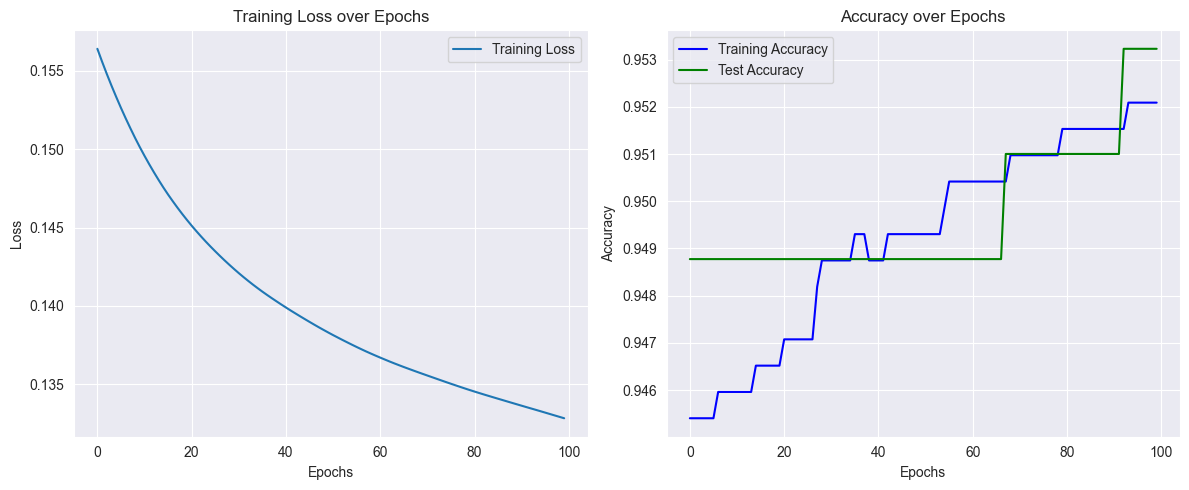

In [47]:
plt.figure(figsize=(12,5))

# Vẽ đồ thị Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Training Accuracy', color='blue')
plt.plot(test_acc_history, label='Test Accuracy', color='green')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
# Đánh giá mô hình
model.eval()  # Chuyển model sang chế độ eval
with torch.no_grad():
    outputs = model(X_test_normalized)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.32%


In [48]:
df_raw_unlabeled

,response,loitering_start_hour,loitering_hours,avg_speed_knots,avg_distance_from_shore_nm
0,-1,3,43.414444,1.131087,28.119723
1,-1,10,73.028056,0.286681,184.875076
2,-1,8,7.076667,1.428517,37.190765
3,-1,9,13.634167,0.155164,195.053557
4,-1,3,27.536389,1.216706,29.085654
...,...,...,...,...,...
188094,-1,4,9.602222,0.647522,85.981389
188095,-1,22,13.881944,1.439303,238.336544
188096,-1,13,6.958333,1.241085,103.361657
188097,-1,11,9.168889,1.020522,178.674157


In [49]:
x = df_raw_unlabeled.drop(columns= "response").values
x

array([[  3.        ,  43.41444444,   1.13108721,  28.11972263],
       [ 10.        ,  73.02805556,   0.28668141, 184.8750759 ],
       [  8.        ,   7.07666667,   1.42851677,  37.19076473],
       ...,
       [ 13.        ,   6.95833333,   1.24108547, 103.3616568 ],
       [ 11.        ,   9.16888889,   1.02052183, 178.6741567 ],
       [ 23.        ,   4.00444444,   1.01944573, 218.9794142 ]])

In [51]:
x_tensor = torch.tensor(x, dtype=torch.float32)
mean = x_tensor.mean(dim=0)
std = x_tensor.std(dim=0)
x_tensor_scaled = (x_tensor - mean) / std

In [58]:
# Đặt mô hình vào chế độ đánh giá (evaluation mode)
model.eval()

# Chuyển đổi dữ liệu chưa gán nhãn sang tensor

# Thực hiện dự đoán trên dữ liệu chưa gán nhãn
with torch.no_grad():
    outputs_unlabeled = model(x_tensor_scaled)
    _, predicted_unlabeled = torch.max(outputs_unlabeled.data, 1)  # Dự đoán nhãn

# Chuyển nhãn dự đoán sang định dạng numpy
predicted_unlabeled_labels = predicted_unlabeled.numpy()

In [63]:
print(predicted_unlabeled_labels[:10])

[0 0 0 0 0 0 0 0 0 0]


In [82]:
# Thêm nhãn dự đoán vào dataframe gốc chưa gán nhãn
df_raw_unlabeled['predicted_response'] = predicted_unlabeled_labels
df_raw_unlabeled

,loitering_start_hour,loitering_hours,avg_speed_knots,avg_distance_from_shore_nm,predicted_response
0,3,43.414444,1.131087,28.119723,0
1,10,73.028056,0.286681,184.875076,0
2,8,7.076667,1.428517,37.190765,0
3,9,13.634167,0.155164,195.053557,0
4,3,27.536389,1.216706,29.085654,0
...,...,...,...,...,...
188094,4,9.602222,0.647522,85.981389,0
188095,22,13.881944,1.439303,238.336544,0
188096,13,6.958333,1.241085,103.361657,0
188097,11,9.168889,1.020522,178.674157,0


In [90]:
# Tạo nhãn "IUU" và "Non-IUU" cho bảng df_raw_unlabel và df_raw_label
df_raw_unlabeled['Label'] = df_raw_unlabeled['predicted_response'].apply(lambda x: "IUU" if x == 0 else "Non-IUU")
df_raw_labeled['Label'] = df_raw_labeled['response'].apply(lambda x: "IUU" if x == 0 else "Non-IUU")

# Kết hợp với bảng df_loiter_data để lấy kinh độ và vĩ độ cho df_raw_unlabel
df_unlabel_combined = df_raw_unlabeled.merge(df_loiter_data, how='left', on=['loitering_hours', 'avg_speed_knots', 'avg_distance_from_shore_nm'])

# Kết hợp với bảng df_loiter_data để lấy kinh độ và vĩ độ cho df_raw_label
df_label_combined = df_raw_labeled.merge(df_loiter_data, how='left', on=['loitering_hours', 'avg_speed_knots', 'avg_distance_from_shore_nm'])

# Kết hợp cả hai bảng df_unlabel_combined và df_label_combined
df_combined = pd.concat([df_unlabel_combined, df_label_combined], ignore_index=True)

df_combined

C:\Users\hieuh\AppData\Local\Temp\ipykernel_6308\4214045727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_labeled['Label'] = df_raw_labeled['response'].apply(lambda x: "IUU" if x == 0 else "Non-IUU")


,loitering_start_hour_x,loitering_hours,avg_speed_knots,avg_distance_from_shore_nm,predicted_response,Label,mmsi,Prediction,carrier_mmsi,start_lat,...,mean_lon,mean_lat,loitering_start_timestamp,loitering_end_timestamp,tot_distance_nm,bunker_mmsi,loitering_start_hour_y,response,response_x,response_y
0,3,43.414444,1.131087,28.119723,0.0,IUU,NaN,NaN,212856000.0,35.485170,...,-1.887811,35.672472,2017-01-05 03:59:08+00:00,2017-01-06T23:24:00Z,49.105523,NaN,3,-1.0,NaN,NaN
1,10,73.028056,0.286681,184.875076,0.0,IUU,NaN,NaN,212856000.0,3.201850,...,2.862958,3.169597,2014-12-28 10:40:17+00:00,2014-12-31T11:41:58Z,20.935786,NaN,10,-1.0,NaN,NaN
2,8,7.076667,1.428517,37.190765,0.0,IUU,NaN,NaN,212856000.0,35.859207,...,-4.468189,35.824197,2016-01-07 08:49:23+00:00,2016-01-07T15:53:59Z,10.109137,NaN,8,-1.0,NaN,NaN
3,9,13.634167,0.155164,195.053557,0.0,IUU,NaN,NaN,212856000.0,2.989312,...,2.772401,2.999408,2015-05-07 09:08:42+00:00,2015-05-07T22:46:45Z,2.115533,NaN,9,-1.0,NaN,NaN
4,3,27.536389,1.216706,29.085654,0.0,IUU,NaN,NaN,212856000.0,35.622352,...,-3.821236,35.738045,2017-01-02 03:23:55+00:00,2017-01-03T06:56:06Z,33.503697,NaN,3,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198528,4,5.707778,0.800018,207.343412,NaN,Non-IUU,412401094.0,Negative,NaN,-45.122533,...,-60.059238,-45.085252,2016-03-20 04:13:39+00:00,2016-03-20T09:56:07Z,4.566327,412401094.0,4,NaN,1.0,1.0
198529,18,4.910556,0.459691,209.205130,NaN,Non-IUU,412401094.0,Negative,NaN,-46.252618,...,-60.875660,-46.235542,2016-02-25 18:56:17+00:00,2016-02-25T23:50:55Z,2.257336,412401094.0,18,NaN,1.0,1.0
198530,0,10.257222,0.732148,210.079943,NaN,Non-IUU,412401094.0,Negative,NaN,-45.031930,...,-60.021713,-45.093156,2016-03-15 00:35:04+00:00,2016-03-15T10:50:30Z,7.509802,412401094.0,0,NaN,1.0,1.0
198531,23,22.502500,1.047429,204.852009,NaN,Non-IUU,412401094.0,Negative,NaN,-41.759935,...,-57.838697,-41.848618,2016-02-28 23:27:49+00:00,2016-02-29T21:57:58Z,23.569782,412401094.0,23,NaN,1.0,1.0


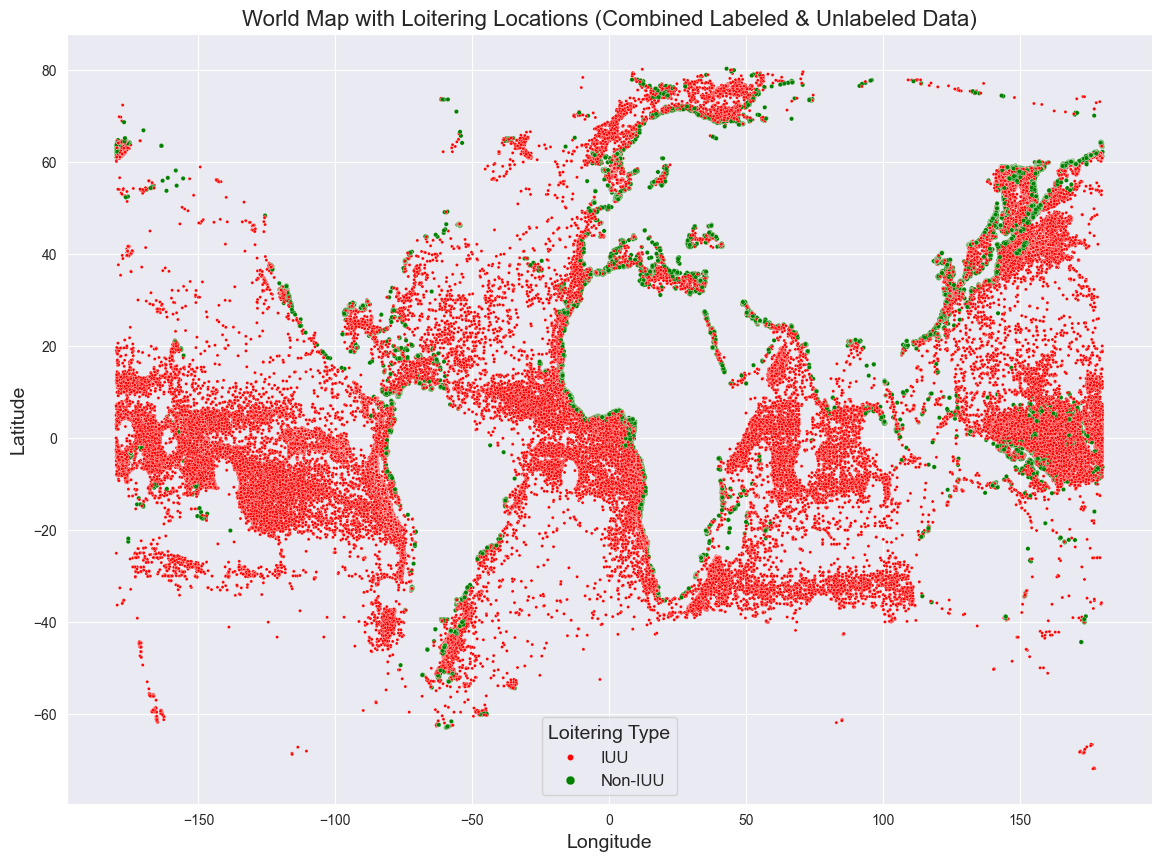

In [93]:
# Phóng to biểu đồ
plt.figure(figsize=(14, 10))  # Tăng kích thước hình ảnh

# Điều chỉnh kích thước của các điểm
size_map = {"IUU": 5, "Non-IUU": 10}  # Kích thước điểm cho từng loại

# Vẽ biểu đồ phân tán với seaborn
sc = sns.scatterplot(data=df_combined, x="mean_lon", y="mean_lat", hue='Label', size='Label', sizes=size_map, palette={"IUU": "red", "Non-IUU": "green"})

# Tiêu đề và điều chỉnh kích thước của chú giải (legend)
plt.title('World Map with Loitering Locations (Combined Labeled & Unlabeled Data)', fontsize=16)
plt.legend(fontsize=12, markerscale=2, title="Loitering Type", title_fontsize=14)  # Điều chỉnh kích thước của legend
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.show()